In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.14.0'

In [3]:
!nvidia-smi

Thu Jan 28 00:39:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    Off  | 00000000:01:00.0  On |                  N/A |
|  0%   42C    P8    16W / 185W |    472MiB /  7979MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

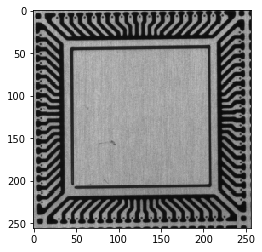

In [29]:
import cv2
import numpy as np
# Read image in color (so we can draw in red)
# img = cv2.imread("O1-3_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_COLOR)
img = cv2.imread("O1-1_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_COLOR)

# 將 OpenCV 讀入的 BGR 格式轉為 Matplotlib 用的 RGB 格式，再交給 Matplotlib 顯示就會得到正確的結果
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = img[:,:,::-1]
plt.imshow(img)

In [30]:
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())

(256, 256, 3)
uint8
10
192


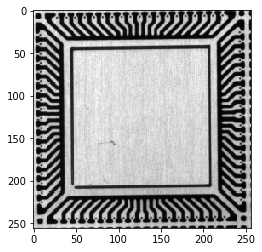

In [31]:
# 如果想要以黑白的方式呈現灰階圖片，可以自己設定 colormap：
# img_gray = cv2.imread("O1-3_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_GRAYSCALE)
img_gray = cv2.imread("O1-1_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_GRAYSCALE)
# 使用 Matplotlib 顯示圖片
plt.imshow(img_gray, cmap = 'gray')


In [32]:
img_gray

array([[168, 183, 160, ..., 136,  51,  30],
       [168, 183, 160, ..., 136,  51,  30],
       [175, 182, 167, ..., 105,  27,  31],
       ...,
       [157, 150, 157, ..., 149, 146, 135],
       [165, 161, 165, ..., 143, 142, 126],
       [164, 154, 165, ..., 142, 148, 119]], dtype=uint8)

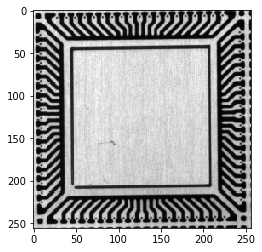

In [33]:
# img = cv2.imread("O1-3_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_UNCHANGED)
img = cv2.imread("O1-1_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_UNCHANGED)
# 使用 Matplotlib 顯示圖片
plt.imshow(img, cmap = 'gray')

In [34]:
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())

(256, 256)
uint8
10
192


In [35]:
# 取得中間矩形區塊 (1)

In [36]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片
m1 =cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY) #圖片轉Gray

In [37]:
print(m1[0])

[188 184 195 183 174 172 180 197 178 184 183 194 192 181 187 179 174 177
 172 164 172 173 157 166 188 175 185 184 184 191 180 186 175 176 178 169
 170 191 186 187 186 164 171 170 165 173 167 172 177 182 170 170 174 168
 157 170 168 161 173 181 176 171 174 169 158 155 152 164 174 179 171 155
 170 182 175 169 152 138 167 166 168 165 166 183 158 151 156 147 143 120
 131 142 152 170 175 174 172 151 156 148 147 162 154 168 181 174 160 157
 155 151 136 149 162 163 162 165 172 169 156 144 148 141 138 142 159 164
 167 170 164 144 129 114 113 115 132 147 166 165 167 145 127 110 100 107
 105 113 138 158 170 165 152 123 101  92  88  99 109 132 161 169 166 146
 101  80  76  77  79  92 127 157 167 164 145 100  75  66  60  60  66 117
 158 167 140  88  59  42  39  42  48  67 122 155 165 150  84  51  39  35
  34  36  48  96 145 155 142  75  46  34  28  28  30  35  74 127 151 134
  75  39  28  24  26  26  31  56 134 155 139  93  39  27  26  24  23  22
  23  22  22  25  29  64 133 149 150 150 120  45  2

In [38]:
print(m1[1])

[188 184 195 183 174 172 180 197 178 184 183 194 192 181 187 179 174 177
 172 164 172 173 157 166 188 175 185 184 184 191 180 186 175 176 178 169
 170 191 186 187 186 164 171 170 165 173 167 172 177 182 170 170 174 168
 157 170 168 161 173 181 176 171 174 169 158 155 152 164 174 179 171 155
 170 182 175 169 152 138 167 166 168 165 166 183 158 151 156 147 143 120
 131 142 152 170 175 174 172 151 156 148 147 162 154 168 181 174 160 157
 155 151 136 149 162 163 162 165 172 169 156 144 148 141 138 142 159 164
 167 170 164 144 129 114 113 115 132 147 166 165 167 145 127 110 100 107
 105 113 138 158 170 165 152 123 101  92  88  99 109 132 161 169 166 146
 101  80  76  77  79  92 127 157 167 164 145 100  75  66  60  60  66 117
 158 167 140  88  59  42  39  42  48  67 122 155 165 150  84  51  39  35
  34  36  48  96 145 155 142  75  46  34  28  28  30  35  74 127 151 134
  75  39  28  24  26  26  31  56 134 155 139  93  39  27  26  24  23  22
  23  22  22  25  29  64 133 149 150 150 120  45  2

In [39]:
print(m1[2])

[190 186 170 173 170 176 163 184 178 188 173 178 180 178 177 172 172 158
 167 165 159 172 166 166 179 174 184 193 194 180 173 168 159 163 160 150
 170 180 187 178 182 165 165 146 149 150 154 157 165 169 171 172 162 144
 127 126 123 129 152 173 163 174 169 161 144 123 115 109 118 141 145 157
 162 171 151 128  96  89  96 119 139 158 174 172 143 110  88  69  67  64
  76 116 152 165 172 151 116  82  67  62  65  75  99 150 170 171 152 103
  70  54  47  52  57  79 125 157 168 149  87  59  47  41  40  45  59 108
 154 166  88  47  37  34  31  33  41  80 152 160 143  71  39  33  30  31
  29  34  56 130 154 140  73  36  30  27  27  28  30  47 122 158 150  80
  34  28  25  24  25  28  41 106 162 146  74  32  25  24  22  23  25  54
 139 140  88  33  23  21  19  20  19  27  57 137 155  96  33  23  21  20
  19  20  24  40 122 150  96  33  24  20  18  19  19  22  35 105 149 113
  36  22  19  17  17  18  19  33 106 146 124  49  24  18  18  17  15  16
  16  17  18  18  20  36 122 151 147 151  97  28  2

In [40]:
m2[0], m2[1]

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
          0,   0,   0,   0,   0, 255,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0, 255,   0,   0,   0,   0, 255,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,
          0,   0,   0,   0, 255,   0,   0,   0,   0

In [41]:
# m2=cv2.Canny(m1,200,250) #邊緣偵測
m2=cv2.Canny(m1,50,200) #邊緣偵測
m3=cv2.dilate(m2, np.ones((4,4))) #膨脹
m4=cv2.erode(m3, np.ones((4,4))) #侵蝕
m5=cv2.erode(m4, np.ones((2,2))) #第二次侵蝕

In [42]:
a, b=cv2.findContours(m5, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) #取得輪廓資料
x, y, h, w =cv2.boundingRect(a[0]) #取得包覆指定輪廓點的最小正矩形
m6 = m0[y:y+h, x: x+w] #裁切所需要的範圍
n = m + '_zoom.jpg'
cv2.imwrite(f"./{n}", m6) #檔案儲存
len(a)

80

In [43]:
# 取得中間矩形區塊 (2)

In [44]:
import cv2
import numpy as np

In [45]:
m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片
m1 =cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY) #圖片轉Gray

In [46]:
print(m1)

[[188 184 195 ... 164 154 141]
 [188 184 195 ... 164 154 141]
 [190 186 170 ... 165 151 136]
 ...
 [193 202 193 ... 156 167 162]
 [194 197 189 ... 154 163 155]
 [196 198 201 ... 152 171 163]]


In [47]:
thresh=cv2.Canny(m1,128,256) #邊緣偵測

In [48]:
contours, hierarchy=cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) #取得輪廓資料

In [49]:
def draw_approx_hull_polygon(img, cnts):
    # img = np.copy(img)
    img = np.zeros(img.shape, dtype=np.uint8)

    cv2.drawContours(img, cnts, -1, (255, 0, 0), 2)  # blue

    epsilion = img.shape[0]/32
    approxes = [cv2.approxPolyDP(cnt, epsilion, True) for cnt in cnts]
    cv2.polylines(img, approxes, True, (0, 255, 0), 2)  # green

    hulls = [cv2.convexHull(cnt) for cnt in cnts]
    cv2.polylines(img, hulls, True, (0, 0, 255), 2)  # red

    # 我个人比较喜欢用上面的列表解析，我不喜欢用for循环，看不惯的，就注释上面的代码，启用下面的
    # for cnt in cnts:
    #     cv2.drawContours(img, [cnt, ], -1, (255, 0, 0), 2)  # blue
    #
    #     epsilon = 0.01 * cv2.arcLength(cnt, True)
    #     approx = cv2.approxPolyDP(cnt, epsilon, True)
    #     cv2.polylines(img, [approx, ], True, (0, 255, 0), 2)  # green
    #
    #     hull = cv2.convexHull(cnt)
    #     cv2.polylines(img, [hull, ], True, (0, 0, 255), 2)  # red
    return img

In [50]:
def draw_min_rect_circle(img, cnts):  # conts = contours
    img = np.copy(img)

    for cnt in cnts:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # blue

        min_rect = cv2.minAreaRect(cnt)  # min_area_rectangle
        min_rect = np.int0(cv2.boxPoints(min_rect))
        cv2.drawContours(img, [min_rect], 0, (0, 255, 0), 2)  # green

        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center, radius = (int(x), int(y)), int(radius)  # for the minimum enclosing circle
        img = cv2.circle(img, center, radius, (0, 0, 255), 2)  # red
    return img

In [51]:
imgs = [
    m2, 
    draw_min_rect_circle(m2, contours),
    draw_approx_hull_polygon(m2, contours),
]

In [52]:
imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   0,   0, ..., 255,   0,   0],
        [  0,   0,   0, ..., 255,   0,   0],
        [  0,   0,   0, ..., 255,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [53]:
for img in imgs:
    cv2.imwrite("%s.jpg" % id(img), img)
#     cv2.imshow("contours", img)

In [54]:
#邊緣偵測

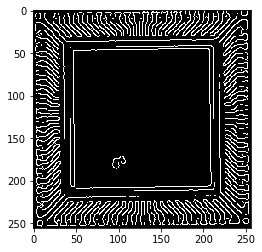

In [55]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片
m1 =cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY) #圖片轉Gray
# m2=cv2.Canny(m1,200,250) #邊緣偵測
# m2=cv2.Canny(m1,100,250) #邊緣偵測
blurred = cv2.GaussianBlur(m1, (5, 5), 0)
m2=cv2.Canny(blurred,20, 160) #邊緣偵測
plt.imshow(m2, cmap = 'gray')

In [56]:
# 取得中間矩形區塊 (3) >>> 成功

In [57]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "O1-1_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "U1-2_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片
m1 =cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY) #圖片轉Gray

In [58]:
# blurred = cv2.GaussianBlur(m1, (11, 11), 0)
blurred = cv2.GaussianBlur(m1, (15, 15), 0)
# binaryIMG = cv2.Canny(blurred, 100,250)
binaryIMG = cv2.Canny(blurred, 20, 160)

th, dst = cv2.threshold(binaryIMG, 127, 255, cv2.THRESH_BINARY)

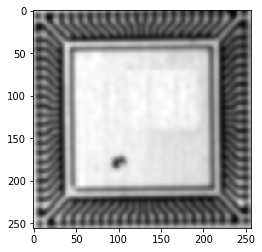

In [59]:
# import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(blurred, cmap = 'gray')

In [60]:
cnts, _ = cv2.findContours(dst.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = m0.copy()
len(cnts)

41

In [61]:
if len(cnts) != 0:
    # draw in blue the contours that were founded
    cv2.drawContours(clone, cnts, -1, 255, 1)

    # find the biggest countour (c) by the area
    c = max(cnts, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(clone,(x,y),(x+w,y+h),(0,255,0),2)


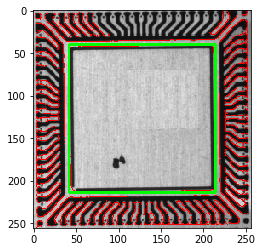

In [62]:
# import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(clone, cmap = 'gray')

In [63]:
x,y,w,h

(42, 40, 172, 174)

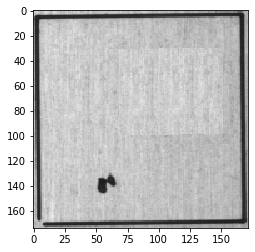

In [64]:
# 裁切區域的 x 與 y 座標（左上角）
# x = 100
# y = 100

# # 裁切區域的長度與寬度
# w = 250
# h = 150

clone = m0.copy()
# 裁切圖片
crop_img = clone[y:y+h, x:x+w]

plt.imshow(crop_img, cmap = 'gray')

In [65]:
crop_img

array([[[194, 194, 194],
        [188, 188, 188],
        [209, 209, 209],
        ...,
        [168, 168, 168],
        [171, 171, 171],
        [176, 176, 176]],

       [[196, 196, 196],
        [206, 206, 206],
        [207, 207, 207],
        ...,
        [164, 164, 164],
        [176, 176, 176],
        [180, 180, 180]],

       [[201, 201, 201],
        [191, 191, 191],
        [193, 193, 193],
        ...,
        [165, 165, 165],
        [171, 171, 171],
        [178, 178, 178]],

       ...,

       [[197, 197, 197],
        [190, 190, 190],
        [170, 170, 170],
        ...,
        [147, 147, 147],
        [156, 156, 156],
        [153, 153, 153]],

       [[193, 193, 193],
        [193, 193, 193],
        [187, 187, 187],
        ...,
        [155, 155, 155],
        [160, 160, 160],
        [167, 167, 167]],

       [[190, 190, 190],
        [175, 175, 175],
        [181, 181, 181],
        ...,
        [150, 150, 150],
        [167, 167, 167],
        [169, 169, 169]]

2
area[ 1 ] 11.5


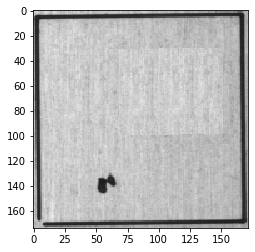

In [66]:

clone = crop_img.copy()
# convert to gray and threshold to get a binary image
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
binaryIMG = cv2.Canny(blurred, 20, 160)
# th, dst = cv2.threshold(binaryIMG, 127, 255, cv2.THRESH_BINARY)
# invert image
# dst = cv2.bitwise_not(dst)
# find contours
# countours,hierarchy=cv2.findContours(dst,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
countours,hierarchy=cv2.findContours(binaryIMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
countours_sort = sorted(countours, key=cv2.contourArea, reverse=True)  # Sort by area, descending
print(len(countours_sort))


# print(len(countours), len(hierarchy))

# blurred = cv2.GaussianBlur(gray, (15, 15), 0)
# binaryIMG = cv2.Canny(blurred, 20, 160)
# m3=cv2.dilate(binaryIMG, np.ones((4,4))) #膨脹
# m4=cv2.erode(m3, np.ones((4,4))) #侵蝕
# m5=cv2.erode(m4, np.ones((2,2))) #第二次侵蝕
# countours, _ = cv2.findContours(m5.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# print(len(countours))

# draw contours
i = 0
# for cnt in countours:
for i in range(1, len(countours_sort)):
#         cv2.drawContours(clone,[cnt],0,(0,255,0),1)

        area = cv2.contourArea(countours_sort[i])
        print("area[", i, "]", area)
        
#         if area > 10 :
#             cv2.drawContours(clone,[countours_sort[i]],0,(0,255,0),1)
            
#         cv2.drawContours(clone,[countours_sort[i]],0,(0,255,0),1)
        if i==3:
            cv2.drawContours(clone,[countours_sort[i]],0,(0,255,0),1)
            plt.imshow(clone, cmap = 'gray')
            break

        plt.imshow(clone, cmap = 'gray')
#         if i==2:
#             cv2.drawContours(clone,[cnt],0,(0,255,0),1)
#             plt.imshow(clone, cmap = 'gray')
#             break
#         i+=1
#         cv2.imshow("Result",img)
#         cv2.waitKey(0)
# show image
# plt.imshow(clone, cmap = 'gray')
# cv2.imshow("Result",clone)


In [67]:
img_gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(crop_img,start,end,[0,255,0],2)
    cv2.circle(crop_img,far,5,[0,0,255],-1)

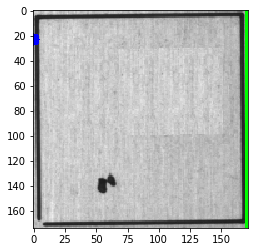

In [68]:

plt.imshow(crop_img, cmap = 'gray')

In [71]:
import cv2 as cv
import numpy as np
img1 = cv.imread('star.jpg',0)
img2 = cv.imread('star2.jpg',0)
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)


IndexError: list index out of range

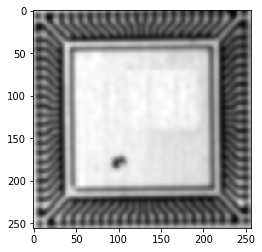

In [72]:
blurred = cv2.GaussianBlur(m1, (15, 15), 0)
plt.imshow(blurred, cmap = 'gray')

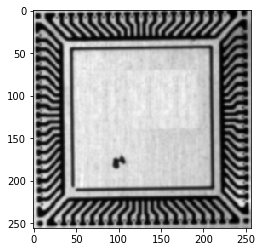

In [73]:
blurred = cv2.GaussianBlur(m1, (15, 15), 1)
plt.imshow(blurred, cmap = 'gray')

In [341]:
# find-and-draw-the-largest-contour-in-opencv-on-a-specific-color-python
# https://stackoverflow.com/questions/44588279/find-and-draw-the-largest-contour-in-opencv-on-a-specific-color-python

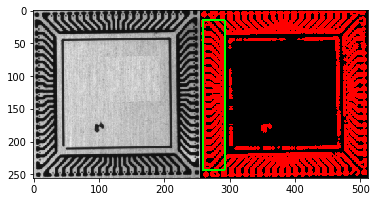

In [74]:
import numpy as np
import cv2

# load the image
image = cv2.imread("O1-3_ept8_G1_L2020_F2-1.tif", 1)

x,y,w,h

# red color boundaries [B, G, R]
lower = [1, 0, 20]
upper = [60, 40, 220]

# create NumPy arrays from the boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(image, lower, upper) #lower60===>0,upper200==>0，lower～upper==>255

output = cv2.bitwise_and(image, image, mask=mask)

ret,thresh = cv2.threshold(mask, 40, 255, 0)
#                                阈值, 填充色, 阈值类型
# 阈值类型	小于阈值的像素点	大于阈值的像素点
# 0			置0				置填充色
# 1			置填充色			置0
# 2			保持原色			置灰色
# 3			置0				保持原色
# 4			保持原色			置0

if (int(cv2.__version__[0]) > 3):
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
else:
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) != 0:
    # draw in blue the contours that were founded
    cv2.drawContours(output, contours, -1, 255, 3)

    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)

# show the images
# cv2.imshow("Result", np.hstack([image, output]))
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.hstack([image, output]), cmap = 'gray')

In [75]:
!ps -aux

USER       PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root         1  0.0  0.2 375764 90708 ?        Ssl  Jan27   1:57 /usr/bin/python
root        82  0.0  0.0      0     0 ?        Z    Jan27   0:00 [pip] <defunct>
root       111  0.0  0.0      0     0 ?        Zs   Jan27   0:00 [sh] <defunct>
root       112  0.0  0.0      0     0 ?        Z    Jan27   0:00 [pip] <defunct>
root       118  0.0  0.0  20252  3832 pts/0    Ss+  Jan27   0:00 /bin/bash
root      1323  2.3  0.4 1728036 136524 ?      Ssl  06:27   0:04 /usr/bin/python
root      1354  0.0  0.0   4624   788 pts/1    Ss+  06:30   0:00 /bin/sh -c ps -
root      1355  0.0  0.0  36144  3292 pts/1    R+   06:30   0:00 ps -aux


(256, 256, 3)


(65536, 3)

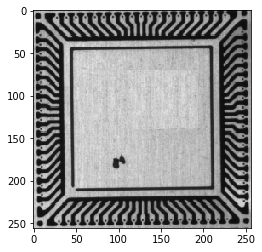

In [76]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片

img = cv2.cvtColor(m0, cv2.COLOR_BGR2RGB)
img = img / 255
# img = img[:,:,::-1]
plt.imshow(img)
print(img.shape)


pic_n = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
pic_n.shape

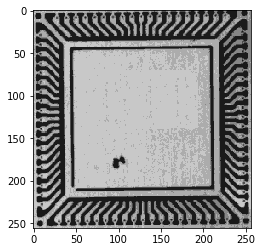

In [77]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(cluster_pic)

In [78]:
!pip install sklearn

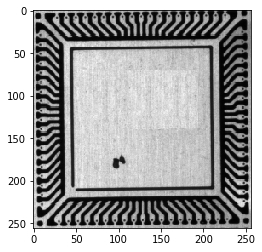

In [79]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片
gray = cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

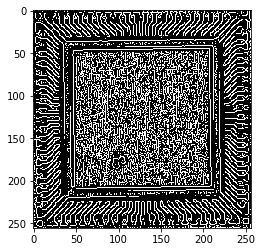

In [80]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
m0 = cv2.imread(m, 1) #抓取圖片

gray = cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,1,10,apertureSize = 3)
plt.imshow(edges, cmap='gray')

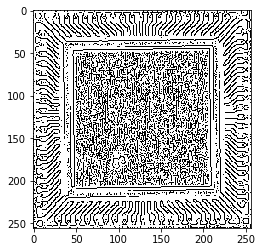

In [81]:
edges = cv2.bitwise_not(edges)
plt.imshow(edges, cmap='gray')

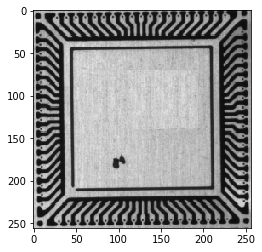

In [82]:
cv2.imwrite("palmlines.jpg", edges)
palmlines = cv2.imread("palmlines.jpg", 1) #抓取圖片

img = cv2.addWeighted(m0, 0.3, palmlines, 0.7, 0)
rgb = cv2.cvtColor(m0, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

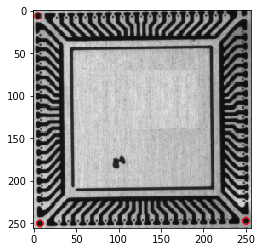

In [83]:
# Standard imports
import cv2
import numpy as np

# Read image
im = cv2.imread("O1-3_ept8_G1_L2020_F2-1.tif", cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
# Detect blobs.
keypoints = detector.detect(im)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(im_with_keypoints)

In [84]:
crop_img

array([[[194, 194, 194],
        [188, 188, 188],
        [209, 209, 209],
        ...,
        [168, 168, 168],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[196, 196, 196],
        [206, 206, 206],
        [207, 207, 207],
        ...,
        [164, 164, 164],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[201, 201, 201],
        [191, 191, 191],
        [193, 193, 193],
        ...,
        [165, 165, 165],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[197, 197, 197],
        [190, 190, 190],
        [170, 170, 170],
        ...,
        [147, 147, 147],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[193, 193, 193],
        [193, 193, 193],
        [187, 187, 187],
        ...,
        [155, 155, 155],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[190, 190, 190],
        [175, 175, 175],
        [181, 181, 181],
        ...,
        [150, 150, 150],
        [  0, 255,   0],
        [  0, 255,   0]]

[<KeyPoint 0x7f96cac737e0>]

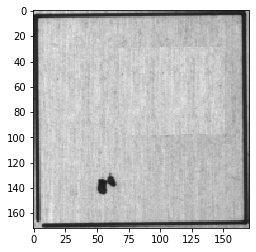

In [85]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "O1-1_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "U1-2_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "O1_背面_ept8_G1_L2020_F2-2.tif"
# m = "O1_背面_ept12_G1_L2020_F2-1.tif"
m0 = cv2.imread(m, 1) #抓取圖片
m1 =cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY) #圖片轉Gray

# blurred = cv2.GaussianBlur(m1, (11, 11), 0)
# blurred = cv2.GaussianBlur(m1, (15, 15), 0)
# binaryIMG = cv2.Canny(blurred, 100,250)
binaryIMG = cv2.Canny(blurred, 20, 160)

th, dst = cv2.threshold(binaryIMG, 127, 255, cv2.THRESH_BINARY)

cnts, _ = cv2.findContours(dst.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = m0.copy()
len(cnts)

if len(cnts) != 0:
    # draw in blue the contours that were founded
    cv2.drawContours(clone, cnts, -1, 255, 1)

    # find the biggest countour (c) by the area
    c = max(cnts, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(clone,(x,y),(x+w,y+h),(0,255,0),2)

# 裁切區域的 x 與 y 座標（左上角）
# x = 100
# y = 100

# # 裁切區域的長度與寬度
# w = 250
# h = 150

clone = m0.copy()
# 裁切圖片
crop_img = clone[y:y+h, x:x+w]

plt.imshow(crop_img, cmap = 'gray')

clone = crop_img.copy()
clone = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img = cv2.dilate(clone, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=2)
img = cv2.dilate(img, kernel, iterations=1)

params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 3
params.maxThreshold = 128
params.filterByArea = True
params.minArea = 1
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# params.minThreshold = 10
# params.maxThreshold = 128
# params.filterByArea = True
# params.minArea = 30  # The dot in 20pt font has area of about 30
# params.filterByCircularity = True
# params.minCircularity = 0.7
# params.filterByConvexity = True
# params.minConvexity = 0.8
# params.filterByInertia = True
# params.minInertiaRatio = 0.4

# params.filterByArea = True
# params.minArea=15

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)
# Detect blobs.
keypoints = detector.detect(clone)
keypoints

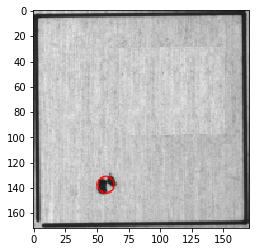

In [86]:

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(clone, keypoints, np.array([]), (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(im_with_keypoints)

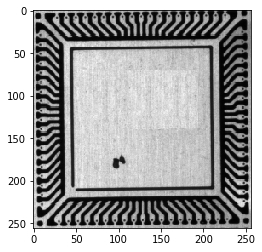

In [90]:
import cv2
import numpy as np

m = "O1-3_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "O1-1_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "U1-2_ept8_G1_L2020_F2-1.tif" #圖片名稱
# m = "O1_背面_ept8_G1_L2020_F2-2.tif"
# m = "O1_背面_ept12_G1_L2020_F2-1.tif"
m0 = cv2.imread(m, 1) #抓取圖片
image =cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY) #圖片轉Gray


plt.imshow(image, cmap="gray")
plt.show()



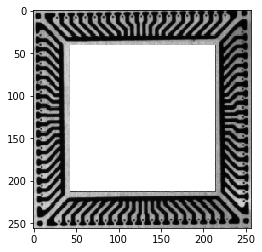

In [97]:

# 中心區域，填充白色255
image[y:y+h, x:x+w] = 255
plt.imshow(image, cmap="gray")
plt.show()


# # 建立矩形區域，填充白色255
# rectangle = np.zeros(image.shape[0:2], dtype="uint8")
# cv2.rectangle(rectangle, (x, y), (x+w, y+h), 0, -1) # 修改這裡

# # cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

# # x1,y1 ------
# # |          |
# # |          |
# # |          |
# # --------x2,y2

# masked = cv2.bitwise_not(image, image, mask=rectangle)

# plt.imshow(masked, cmap="gray")
# plt.show()


